In [15]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

pd.set_option('display.float_format', lambda x: '%.2f' % x)

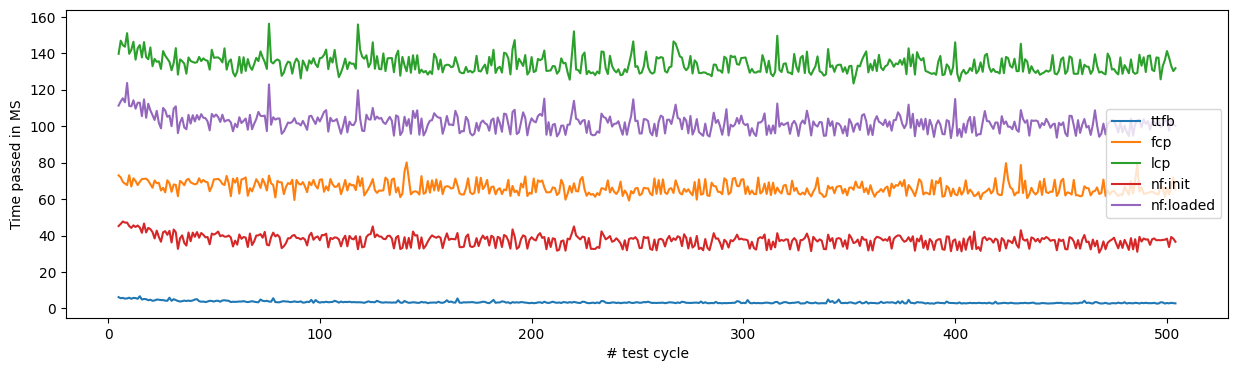

In [19]:
df = pd.read_csv('../../../../data/core-web-vitals/testrun-8/results-csr.csv', sep=',')

features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
target_features = ['ttfb', 'fcp', 'lcp',  'nf:init', 'nf:loaded'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 4))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('# test cycle')
plt.ylabel('Time passed in MS')
plt.legend(loc="right")
plt.show()

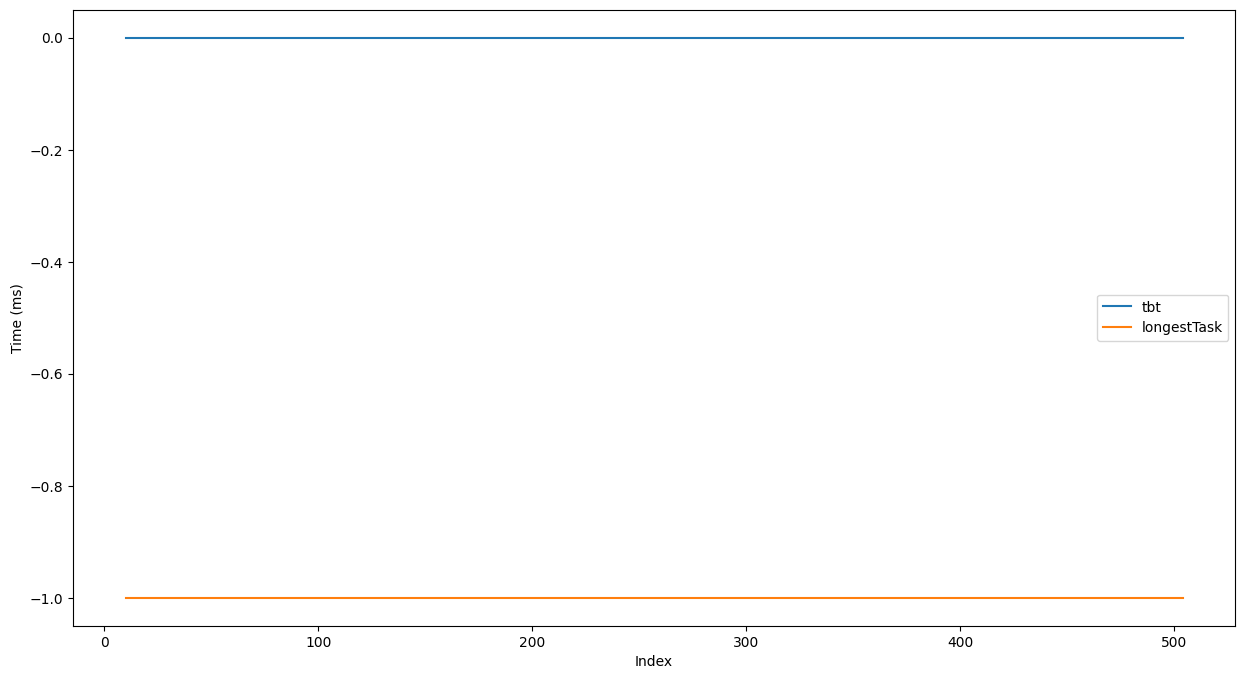

In [17]:

target_features = ['tbt', 'longestTask'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 8))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

In [18]:
features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
headers = ["feature","Tests", "min", "1st Qrt.", "mean", "median", "3rd Qrt.", "max", "std dev."] 
report = []

for f in features:
  report.append([
      f,
      df[f].size,
      df[f].min(),
      df[f].quantile(0.25),
      df[f].mean(),
      df[f].median(),
      df[f].quantile(0.75),
      df[f].max(),
      df[f].std(),
  ])

pd.DataFrame(report, columns=headers)

,feature,Tests,min,1st Qrt.,mean,median,3rd Qrt.,max,std dev.
0,navTime,495,7.00,8.00,8.25,8.00,9.00,21.00,1.16
1,totalTime,495,57.00,71.00,78.59,74.00,90.00,113.00,11.21
2,lcp,495,123.40,129.80,133.80,132.90,137.30,156.20,4.74
3,fcp,495,59.20,63.10,66.09,65.70,68.95,80.10,3.48
4,ttfb,495,2.60,3.00,3.37,3.20,3.60,6.70,0.60
5,tbt,495,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,tti,495,59.20,63.10,66.09,65.70,68.95,80.10,3.48
7,longestTask,495,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00
8,longTasks,495,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,nf:init,495,30.60,35.10,37.38,37.90,39.20,46.60,3.03
